# Introduction

This is the code which will be used to aid students identify the recurring topics in research articles using the LDA (Latent Dirichlet Allocation) model. The model will read the abstracts of each article and classify it to the different categories that are keep reocurring in the text.

# Preprocessing of the dataset

These will be the libraries used to preprocess the data set that can be found using the following URL: https://www.kaggle.com/code/amenallahlahmar/nlp-pdf-scientific-article-with-topic-modeling

In [2]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk import punkt
import re
import string

from nltk.corpus import stopwords,words
from sklearn.feature_extraction.text import TfidfVectorizer ,CountVectorizer

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import PCA, LatentDirichletAllocation, TruncatedSVD, NMF
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.manifold import TSNE
import matplotlib.cm as cm

import networkx as nx

And here we have imported the dataset into our code and using the .head() function we can take a look at the top samples of our dataset.

In [3]:
df = pd.read_csv('abstracts.csv')
df

,ID,TITLE,ABSTRACT
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...
...,...,...,...
20967,20968,Contemporary machine learning: a guide for pra...,Machine learning is finding increasingly bro...
20968,20969,Uniform diamond coatings on WC-Co hard alloy c...,Polycrystalline diamond coatings have been g...
20969,20970,Analysing Soccer Games with Clustering and Con...,We present a new approach for identifying si...
20970,20971,On the Efficient Simulation of the Left-Tail o...,The sum of Log-normal variates is encountere...


In [4]:
train_df = df.head(21000)
train_df

,ID,TITLE,ABSTRACT
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...
...,...,...,...
20967,20968,Contemporary machine learning: a guide for pra...,Machine learning is finding increasingly bro...
20968,20969,Uniform diamond coatings on WC-Co hard alloy c...,Polycrystalline diamond coatings have been g...
20969,20970,Analysing Soccer Games with Clustering and Con...,We present a new approach for identifying si...
20970,20971,On the Efficient Simulation of the Left-Tail o...,The sum of Log-normal variates is encountere...


# Cleaning

We will now begin cleaning the text files by first transforming the text into lowercase, and then will remove any numbers or punctuation in the text. In addition, we will preform a tokenization and lemmatizion process to breakdown the sentences into x amount of words and restoring the words to their root word.

We do the lemmatizion process to ensure that the model wouldn't provide similar words (example: Store, stores and stored) different weights, by bringing the words to their orgins (Stores -> store). 

In [5]:
def cleaning_text(text_abstracts):
    #We will begin by Lower case 
    text_abstracts = text_abstracts.lower()
    
    #And then we will remove the numbers from the text.
    text_abstracts = "".join([i for i in text_abstracts if not i.isdigit()])
    
    #We will then remove the punctuations
    text_abstracts = "".join([i for i in text_abstracts if i not in string.punctuation])
    
    #We will then breakdown the text sentences into smaller portions.
    tokens = word_tokenize(text_abstracts)
    
    
    #Removing stop words and then we will begin the Lemmatization process

    lemmatizer = WordNetLemmatizer()
    
    stop_words= stopwords.words('english')



    text_abstracts = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    
    return text_abstracts

# CountVectorization

CountVectorizer is a term that refers to the process of breaking down a sentence or any text into words by doing preprocessing tasks such as converting all words to lowercase and thereby removing special characters.

Because NLP models can not understand textual data and only accept numbers, this textual data must be vectorized.

In our project we will be performing two types of CountVectorization.

The BOW (bag of words) model is a vectorized version of the array of words. It will convert the sentences into a "bag of words" with no meaning.

In [6]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
  

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rayni\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rayni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rayni\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
CountV = CountVectorizer(analyzer=cleaning_text)
CountV_fit = CountV.fit_transform(train_df['ABSTRACT'])
CountV_fit.shape


(20972, 77791)

In [8]:
data = pd.DataFrame(CountV_fit.toarray(),columns = CountV.get_feature_names_out())
data

,aa,aaa,aaaa,aaaagg,aaab,aaai,aaaldotsam,aabb,aabbe,aact,...,ülger,čadek,čebyšev,čech,čechde,černý,šidák,šumenjak,šverák,šámal
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20969,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20970,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
CountV.vocabulary_

{'predictive': 53757,
 'model': 42567,
 'allow': 1604,
 'subjectspecific': 66531,
 'inference': 30991,
 'analyzing': 2141,
 'disease': 16379,
 'related': 57861,
 'alteration': 1867,
 'neuroimaging': 45387,
 'data': 13958,
 'given': 25726,
 'subject': 66518,
 'made': 38274,
 'two': 71882,
 'level': 36100,
 'global': 25829,
 'ie': 30069,
 'identifiying': 30024,
 'condition': 11404,
 'presence': 53972,
 'local': 36997,
 'detecting': 15466,
 'effect': 18397,
 'individual': 30856,
 'measurement': 40635,
 'extracted': 21324,
 'widely': 75908,
 'used': 73528,
 'form': 23347,
 'map': 38717,
 'rarely': 56737,
 'existing': 21008,
 'often': 48194,
 'yield': 77099,
 'noisy': 46116,
 'detection': 15467,
 'composed': 11169,
 'dispersed': 16474,
 'isolated': 32603,
 'island': 32565,
 'article': 3182,
 'propose': 54617,
 'reconstruction': 57322,
 'method': 41212,
 'named': 44504,
 'rsm': 59779,
 'improve': 30563,
 'modeling': 42592,
 'approach': 2806,
 'particular': 50466,
 'binary': 5731,
 'classifie

For the first BOW model we will be running it using the cosince similarity function. This function will compute the similarity as the dot product (normalized) of the X and Y values.

In [10]:
from itertools import combinations
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(CountV_fit, CountV_fit)

print(cosine_sim[1])

[0.05641889 1.         0.         ... 0.10805738 0.01680257 0.        ]


We will also be using the BOW model with TF-IDF (Term Frequency(TF) — Inverse Dense Frequency(IDF)) is a method to determine the meaning of sentences composed of words that overcomes the limitations of the Bag of Words approach, which is useful for text categorization or assisting a machine to interpret words in numbers. 

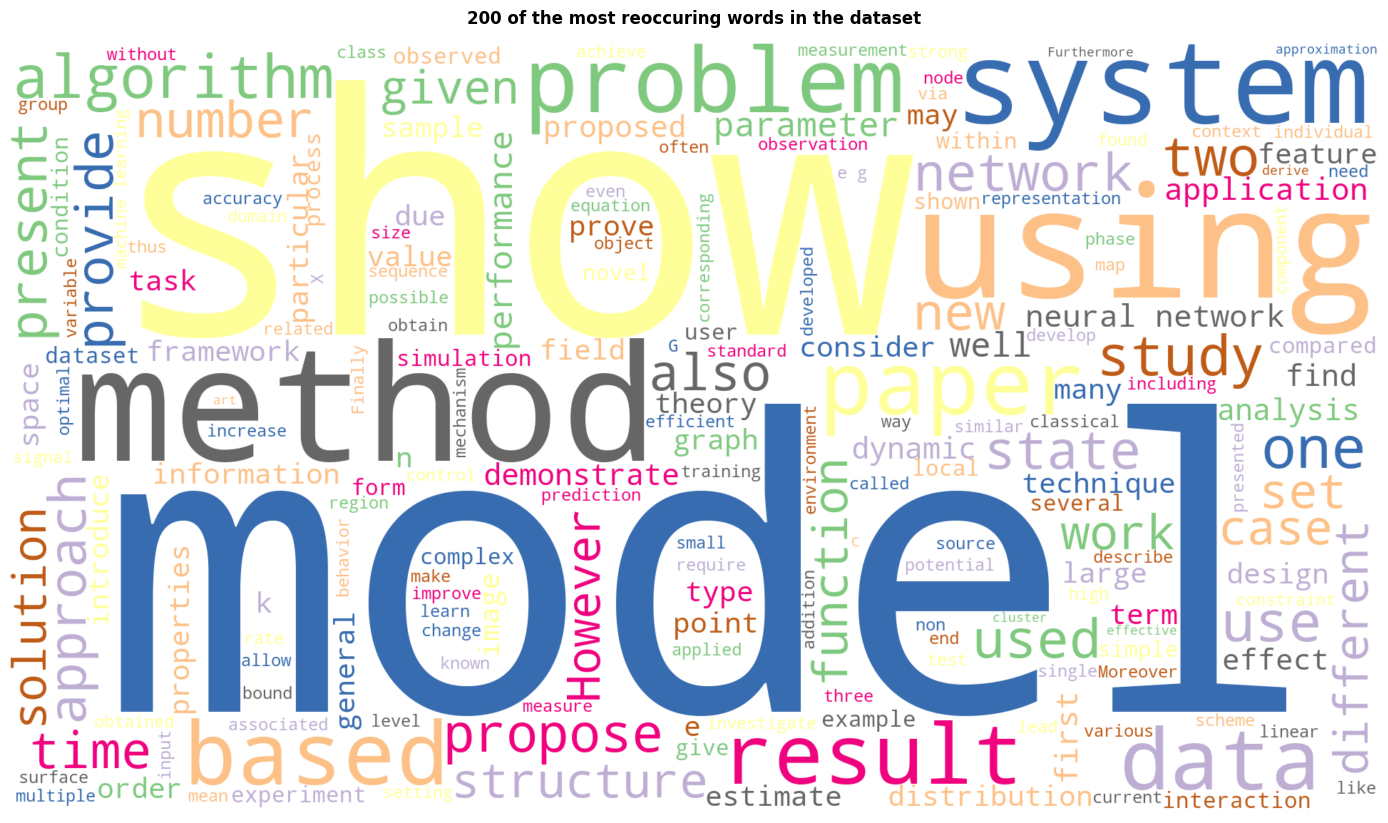

In [11]:
long_string = ','.join(list(train_df.ABSTRACT.values))

stop_words= stopwords.words('english')
word_cloud = WordCloud(stopwords=stop_words ,width=1920, height=1080, 
                      background_color="White", max_words=200, contour_width=3, 
                      colormap='Accent', random_state=720)

word_cloud.generate(long_string)

plt.figure(figsize=(25,10))

plt.imshow(word_cloud, interpolation = 'bilinear')

plt.axis('off')

plt.title("200 of the most reoccuring words in the dataset", pad = 14, weight = 'bold')

plt.imshow(word_cloud, interpolation = 'bilinear')

plt.show()

And here we incorporate the TF-IDF into the CountVectorization.

In [12]:
CountV_TF_IDF = TfidfVectorizer(analyzer=cleaning_text,ngram_range = (1,2))
CountV_TF_IDF_ = CountV_TF_IDF.fit_transform(train_df['ABSTRACT'])
CountV_TF_IDF_.shape

C:\Users\Rayni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\feature_extraction\text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


(20972, 77791)

We will be performing a dimonsionality reduction process to the code which mean that the data is transformed from a high-dimensional space into a low-dimensional space so that the low-dimensional representation retains some significant properties of the original data, ideally close to its intrinsic dimension. This process is known as dimension reduction.

Afterwards, we will begin the Topic Modelling process.

# Topic Modelling

In [13]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    """
    This function will provide the topic names for the algorithms responsible 
    for dimensionality reduction that don't have 
    internal functions to display the topics.
    """
    for n, topic in enumerate(model.components_):
        if not topic_names or not topic_names[n]:
            print("\nTopic ", n)
        else:
            print("\nTopic: '",topic_names[n],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

We will be using **LSA** and **NMF**.

## NMF

NMF also known as **Non-negative Matrix Factorization** is a machine learning method wheer we restrict the matrix to non-negative values.

For example, if we factorize matrix $A$ into two separate matrices $B$ and $C$ 

$A \approx B  C$

However, this is just an approximation and not a guarantee that the matrices are equivalent to the original matrix.

If we are to assume that:
$b_{1},b_{2},b_{3},...,b_{n}$ and $c_{1},c_{2},c_{3},...,c_{m}$

$A \begin{bmatrix} x_{1} \\x_{2} \\ x_{3} \\ ... \\x_{i} \end{bmatrix}$, $B \begin{bmatrix} n_{1} \\n_{2} \\ n_{3} \\ ... \\n_{i} \end{bmatrix}$, $C \begin{bmatrix} m_{1} \\m_{2} \\ m_{3} \\ ... \\m_{i} \end{bmatrix}$

How this equation would make more sense is when we consider the following:

$x_{i} = \begin{bmatrix} n_{i1}, n_{i2}, n_{i3}, ... ,n_{i} \end{bmatrix} \times 
\begin{bmatrix} m_{1} \\m_{2} \\ m_{3} \\ ... \\m_{i} \end{bmatrix} = \sum_{j=1}^{k}nij\times mi$

Where $n_{i}$ are the weights of each components and the $m_{i}$ are the components. In order for the components to be meaningfully interpreted, we introduce a number of conditions. We restrict the weights and underlying components in the case of NMF to be non-negative. NMF basically overlays a certain number of components onto each data point.

### When to use NMF?

NMF is appropriate for tasks where the underlying factors can be interpreted as non-negative. Consider breaking down a term-document matrix where each column represented a document and each element in the document represented the weight of a particular word (the weight could be the raw count, the tf-idf weighted count, or some other encoding scheme; these specifics are not relevant at this point). 

If the documents were taken from news articles, what would happen when we split this up into two matrices? In articles about networks, the word "web" is likely to appear along with other words like "cyber" and "connection.". In order to create a "connection" component vector, these words would likely be grouped together, and each article would have a certain weight for the "connection" topic.

In light of this, an NMF decomposition of the term-document matrix would produce elements that could be regarded as "topics" and decompose each document into a weighted sum of topics. Topic modeling is a crucial NMF application. 
 
Note that using other decomposition techniques would prevent this interpretation from being possible. We are unable to define what it means to weigh food in a "negative" way. This is another instance where the underlying elements (topics) and their weights ought to be non-negative. 
 
The fact that NMF generates sparse representations naturally is another intriguing feature of this algorithm. This makes sense in the context of topic modeling because there are typically not many topics in documents.

### Minimizing formula for NMF model

We use the Frobenius Norm formula to minimize the weight costs.
$||A||_F=\sqrt{\sum_{i=1}^m\sum_{j=1}^n|a_(ij)|^2} $


## LSA

Another fundamental method in topic modeling is Latent Semantic Analysis, or LSA. The fundamental concept is to take a matrix of our existing documents and terms and separate it into a document-topic matrix and a topic-term matrix. 
 
One of the fundamental methods in topic modeling is latent semantic analysis, or LSA. The main concept is to take a matrix of our existing documents and terms and break it down into two separate topic-term and document-topic matrices. 
 
Generation of our document-term matrix comes first. Given m documents and n words in our vocabulary, we can build an m  n matrix A where each row denotes a document and each column denotes a word. Each entry can simply be a raw count of how many times the j-th word appeared in the i-th document in the most basic form of LSA. However, since they do not take into account the importance of each word in the document, raw counts are not particularly useful in practice. For instance, the word "nuclear" probably tells us more about the topic(s) of a given document than the word "test." 
 
As a result, tf-idf scores are frequently used in place of raw counts in document-term matrices in LSA models. Tf-idf, or term frequency-inverse document frequency, assigns the following weight to term j in document i:

$w_{i,j} = tf_{i,j} \times log\frac{N}{df_{j}}$

with $w_{i,j}$ being the tf-idf score, $tf_{i,j}$ being the occurences of the terms in the document, and $log\frac{N}{df_{j}}$ being the total number of documents over the documents containing the term/word.

### Performing dimensionality reduction

Truncated SVD can be used to perform the dimensionality reduction. Singular value decomposition, or SVD, is a technique in linear algebra that factors any matrix M into the product of three different matrices: $M=U*S*V$, where $S$ is a diagonal matrix of the singular values of $M$. 

Importantly, truncated SVD reduces dimensionality by choosing only the $t$ largest singular values and keeping the first $t columns$ of $U$ and $V$. In this case, $t$ is a hyperparameter that we can choose and modify to reflect the quantity of topics we're looking for. AS such we can think of $t$ as the most important dimensions in the transformed space. 

The formula can be written as such:

$A \approx U_{t}S_{t}V_{t}^T$

In [14]:
lsa = TruncatedSVD(n_components=6, random_state=None)
lsa.fit(CountV_TF_IDF_)

TruncatedSVD(n_components=6)

In [15]:
display_topics(model=lsa, feature_names=CountV_TF_IDF.get_feature_names_out(), no_top_words=10)


Topic  0
model, network, method, data, algorithm, problem, learning, system, approach, result

Topic  1
network, learning, neural, deep, data, training, task, image, model, method

Topic  2
algorithm, graph, problem, function, matrix, bound, optimization, solution, n, prove

Topic  3
network, graph, group, neural, node, g, edge, vertex, structure, algebra

Topic  4
graph, model, data, distribution, galaxy, vertex, star, edge, cluster, estimator

Topic  5
algorithm, graph, system, problem, control, optimization, robot, time, solution, state


In [16]:
nmf_model = NMF(n_components=6, random_state=None)
nmf_model.fit(CountV_TF_IDF_)

C:\Users\Rayni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


NMF(n_components=6)

In [17]:
display_topics(model=nmf_model, feature_names=CountV_TF_IDF.get_feature_names_out(), no_top_words=30)


Topic  0
model, data, learning, method, approach, image, task, feature, training, machine, performance, deep, using, prediction, information, classification, proposed, propose, based, system, framework, object, user, paper, used, representation, datasets, human, different, analysis

Topic  1
group, equation, space, function, prove, solution, operator, algebra, result, finite, n, theorem, theory, manifold, class, give, case, condition, set, g, polynomial, boundary, x, point, dimension, paper, also, type, formula, proof

Topic  2
system, state, phase, magnetic, field, quantum, energy, temperature, spin, effect, transition, interaction, density, model, dynamic, galaxy, mass, electron, particle, star, material, structure, time, study, surface, spectrum, coupling, wave, measurement, simulation

Topic  3
network, neural, deep, node, training, architecture, layer, convolutional, learning, social, task, recurrent, weight, community, adversarial, neuron, trained, structure, input, cnn, accurac

## Finding the optimal number of components for the NMF model.

We will be using the SKlearn library for the PCA function to perform a linear dimensionality reduction by projecting the data into a lower dimensional space using SVD (Singular Value Decomposition)

We set the value of the components of the NMF model to 6 prior to the PCA analysis. we will now plot and fit the results of the topics.

In [18]:
topic_r = nmf_model.transform(CountV_TF_IDF_)

In the PCA analysis, we will be using the same number of components as the model  and fit that to our model.

In [20]:
pca = PCA(n_components=6)
pca.fit(topic_r)
pcafeats_train = pca.transform(topic_r)

And here we will be plotting the NMF model based on the number of components and the explained variance ratio.

Text(0.5, 1.0, 'Plof of NMF using 6 Topics (Components)')

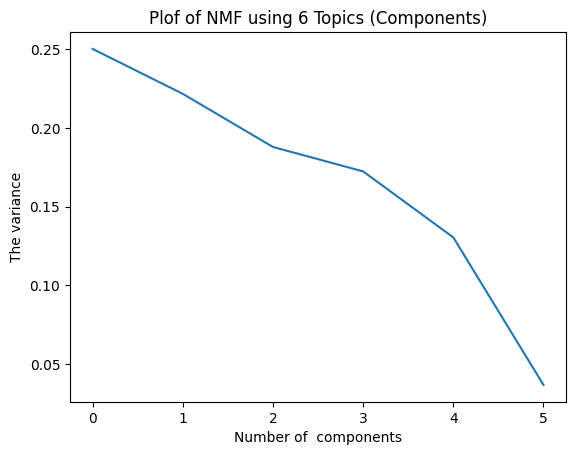

In [24]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of  components')
plt.ylabel('The variance')
plt.title('Plof of NMF using 6 Topics (Components)')

## Adding Topics and performing EDA

We will now be adding the topics into the data set and performing an EDA process to discover the patterns.

In [25]:
train_df['ABSTRACT_Topic'] = topic_r.argmax(axis=1)

C:\Users\Rayni\AppData\Local\Temp\ipykernel_19524\1851464381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['ABSTRACT_Topic'] = topic_r.argmax(axis=1)


In [27]:
final_df = train_df.reset_index()
final_df

,index,ID,TITLE,ABSTRACT,ABSTRACT_Topic
0,0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,0
1,1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,3
2,2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,1
3,3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,1
4,4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,0
...,...,...,...,...,...
20967,20967,20968,Contemporary machine learning: a guide for pra...,Machine learning is finding increasingly bro...,0
20968,20968,20969,Uniform diamond coatings on WC-Co hard alloy c...,Polycrystalline diamond coatings have been g...,2
20969,20969,20970,Analysing Soccer Games with Clustering and Con...,We present a new approach for identifying si...,3
20970,20970,20971,On the Efficient Simulation of the Left-Tail o...,The sum of Log-normal variates is encountere...,5


In [28]:
conditions = [final_df['ABSTRACT_Topic'] == 0, final_df['ABSTRACT_Topic'] == 1 ,final_df['ABSTRACT_Topic'] == 2, final_df['ABSTRACT_Topic'] == 3,final_df['ABSTRACT_Topic'] == 4,final_df['ABSTRACT_Topic'] == 5]
choices = ["Computer Science", 'Physics', 'Mathematics','Statistics','Quantitative Biology','Quantitative Finance']

In [29]:
final_df['ABSTRACT_Topic'] = np.select(conditions, choices,
   default = np.nan)

In [30]:
final_df.head(10)

,index,ID,TITLE,ABSTRACT,ABSTRACT_Topic
0,0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,Computer Science
1,1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,Statistics
2,2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,Physics
3,3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,Physics
4,4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,Computer Science
5,5,6,On maximizing the fundamental frequency of the...,Let $\Omega \subset \mathbb{R}^n$ be a bound...,Physics
6,6,7,On the rotation period and shape of the hyperb...,We observed the newly discovered hyperbolic ...,Mathematics
7,7,8,Adverse effects of polymer coating on heat tra...,The ability of metallic nanoparticles to sup...,Mathematics
8,8,9,SPH calculations of Mars-scale collisions: the...,We model large-scale ($\approx$2000km) impac...,Mathematics
9,9,10,$\mathcal{R}_{0}$ fails to predict the outbrea...,Time varying susceptibility of host at indiv...,Mathematics


In [31]:
reoccuring_topics=pd.DataFrame(topic_r, columns=choices)

In [32]:
reoccuring_topics = reoccuring_topics.reset_index()

In [33]:
reoccuring_topics.head()

,index,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,0,0.053449,0.000715,0.008025,0.000000,0.000000,0.011876
1,1,0.014674,0.004957,0.000000,0.060976,0.000000,0.000000
2,2,0.000000,0.033012,0.000000,0.001112,0.000000,0.006266
3,3,0.000000,0.048923,0.012741,0.000000,0.000000,0.027519
4,4,0.032411,0.000000,0.003642,0.000000,0.001996,0.011008


In [34]:
final_df = final_df.merge(reoccuring_topics,on='index',how='left')

In [35]:
final_df.head(10)

,index,ID,TITLE,ABSTRACT,ABSTRACT_Topic,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,Computer Science,0.053449,0.000715,0.008025,0.000000,0.000000,0.011876
1,1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,Statistics,0.014674,0.004957,0.000000,0.060976,0.000000,0.000000
2,2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,Physics,0.000000,0.033012,0.000000,0.001112,0.000000,0.006266
3,3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,Physics,0.000000,0.048923,0.012741,0.000000,0.000000,0.027519
4,4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,Computer Science,0.032411,0.000000,0.003642,0.000000,0.001996,0.011008
5,5,6,On maximizing the fundamental frequency of the...,Let $\Omega \subset \mathbb{R}^n$ be a bound...,Physics,0.000482,0.032287,0.003018,0.000000,0.000839,0.004765
6,6,7,On the rotation period and shape of the hyperb...,We observed the newly discovered hyperbolic ...,Mathematics,0.006649,0.002843,0.018058,0.000000,0.000065,0.001637
7,7,8,Adverse effects of polymer coating on heat tra...,The ability of metallic nanoparticles to sup...,Mathematics,0.000774,0.000000,0.048614,0.002285,0.000000,0.000000
8,8,9,SPH calculations of Mars-scale collisions: the...,We model large-scale ($\approx$2000km) impac...,Mathematics,0.000000,0.001562,0.073409,0.000000,0.000000,0.000000
9,9,10,$\mathcal{R}_{0}$ fails to predict the outbrea...,Time varying susceptibility of host at indiv...,Mathematics,0.016318,0.006812,0.020979,0.001522,0.000690,0.000000
